# Tiesinis programavimas. Matematinis programavimas. Laboratorinis darbas Nr. 1

Darbą atliko: Eimantas Zaranka IF1900011



# Darbo tikslai:
- išspręsti tiesinio programavimo uždavinį;
- išnagrinėti algoritmo vykdymo laiko priklausomybę nuo uždavinio dydžio.

# Užduotis

Išspręskite uždavinį keletą kartų, vis didinant jo apimtį, ir nubraižykite algoritmo vykdymo laiko
funkciją (t.y. vykdymo laiko priklausomybę nuo uždavinio dydžio):

## Duota funkcija

max $\sum_{j=1}^{n} 10^{n-1}x_j$

## Duoti ribojimai

2$\sum_{j=1}^{i-1} 10^{i-j}x_j+x_i \leq 100^{i-1}$

$1 \leq i \leq n$

$x_j \geq 0$

$1 \leq j \leq n$

# Bibliotekų importavimas

In [1]:
!pip install pulp

     |████████████████████████████████| 41.2 MB 75 kB/s 


In [2]:
!apt install glpk-utils
!pip install glpk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev
The following NEW packages will be installed:
  glpk-utils libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 692 kB of archives.
After this operation, 1,664 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libcolamd2 amd64 1:5.1.2-2 [16.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglpk40 amd64 4.65-1 [378 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 glpk-utils amd64 4.65-1 [269 kB]
Fetched 6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pulp as p
from scipy.optimize import linprog

# Simplex algoritmo realizavimas

In [4]:
def create_problem_variables_v2(n):
  return p.LpVariable.dicts(
    "x", range(1, n+1), 
    lowBound = 0)

In [5]:
def create_constrains(n, probVars):
  con = []
   
  for i in range(1,n+1):
    vec = []
    if i == 1:
      pass
    else:
      for j in range(1, i):
        vec.append(2*(10**(i-j))*10**(n-1)*probVars[j])
    vec.append(10**(n-1)*probVars[i])

    con.append(vec)
  return con


In [6]:
def create_constrains_v2(n, probVars):
  con = []
   
  for i in range(1,n+1):
    vec = []
    if i == 1:
      pass
    else:
      for j in range(1, i):
        vec.append(2*(10**(i-j))*probVars[j])
    vec.append(probVars[i])

    con.append(vec)
  return con

In [ ]:
n = 5 # max 122
#Pulp init
Lp_prob = p.LpProblem("Problem", p.LpMaximize)

#creating variables
probVars = create_problem_variables_v2(n)

#init target function
Lp_prob += p.lpSum([10**(n-1)*probVars[i] for i in probVars])

#create constrains
con = create_constrains_v2(n, probVars)

#init constrains
for i, item in enumerate(con):
  Lp_prob += p.lpSum(item) <= 100**(i)

print(Lp_prob)

Lp_prob.solve(solver=p.GLPK(msg=False))

print(p.LpStatus[Lp_prob.status])
print('Optimized function value: ',p.value(Lp_prob.objective))

for var in Lp_prob.variables():
  print(var.name, ': ', var.varValue)

In [7]:
import time

In [8]:
def simplex(n):
  #Pulp init
  Lp_prob = p.LpProblem("Problem", p.LpMaximize)

  #creating variables
  probVars = create_problem_variables_v2(n)

  #init target function
  Lp_prob += p.lpSum([10**(n-1)*probVars[i] for i in probVars])

  #create constrains
  con = create_constrains_v2(n, probVars)

  #init constrains
  for i, item in enumerate(con):
    Lp_prob += p.lpSum(item) <= 100**(i)

  t1 = time.perf_counter()
  Lp_prob.solve(solver=p.GLPK(msg=False))
  t2 = time.perf_counter()
  #print(p.LpStatus[Lp_prob.status])
  #print('Optimized function value: ',p.value(Lp_prob.objective))

  #for var in Lp_prob.variables():
  #  print(var.name, ': ', var.varValue)

  return round(t2-t1, 5)


In [9]:
ns = [i for i in range(5,101)]

In [10]:
ti = []

for n in ns:
  t = simplex(n)
  ti.append((n,t))

In [11]:
single_df = pd.DataFrame(ti, columns=['n', 'time'])
single_df.head()

,n,time
0,5,0.01543
1,6,0.01005
2,7,0.01004
3,8,0.01046
4,9,0.01076


In [34]:
ti = []
for _ in range(10):
  part_time = []
  for n in ns:
    tmp = simplex(n)
    part_time.append(tmp)

  ti.append(part_time)

In [41]:
ten_exp = pd.DataFrame(ti, columns=ns)
ten_avg = ten_exp.mean()

# Algoritmo laiko vykdymo funkcija

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

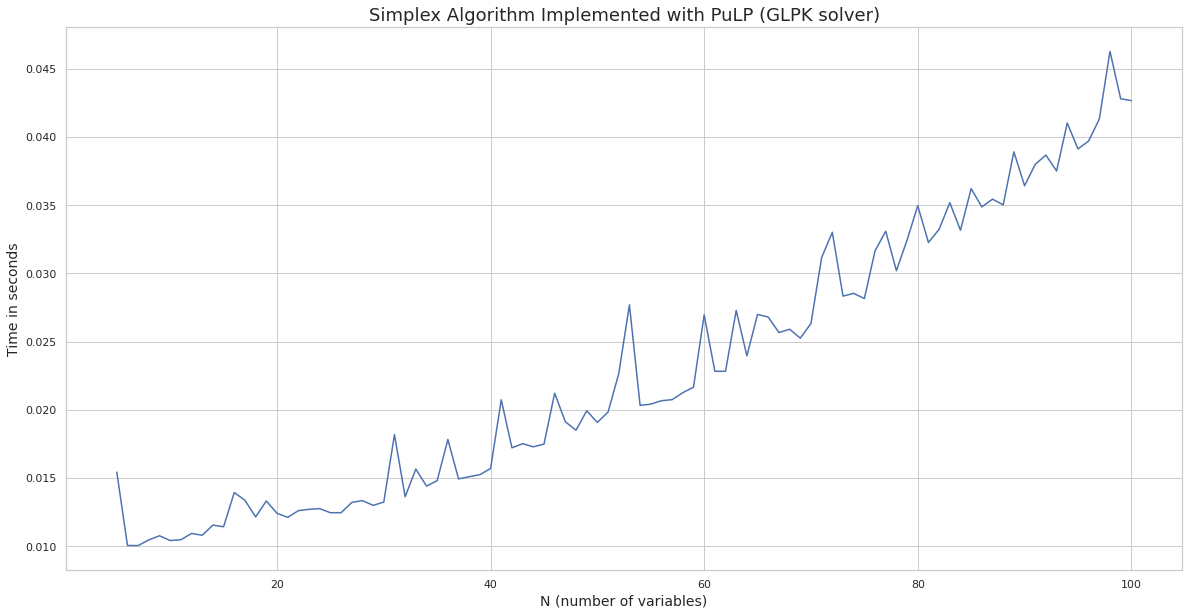

In [29]:
ax = sns.lineplot(x=single_df.n, y=single_df.time)
ax.set_title('Simplex Algorithm Implemented with PuLP (GLPK solver)', fontsize=18)
ax.set_ylabel('Time in seconds', fontsize=14)
ax.set_xlabel('N (number of variables)', fontsize=14)
plt.savefig('simplex_pulp_one')

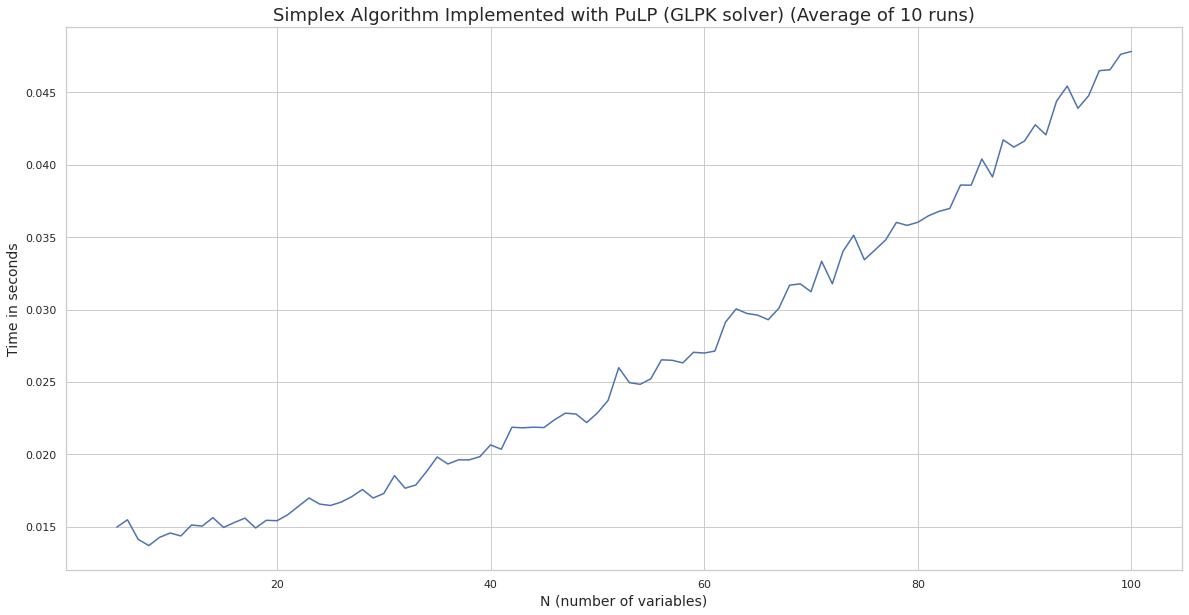

In [47]:
ax = sns.lineplot(x=ten_avg.index, y=ten_avg.values)
ax.set_title('Simplex Algorithm Implemented with PuLP (GLPK solver) (Average of 10 runs)', fontsize=18)
ax.set_ylabel('Time in seconds', fontsize=14)
ax.set_xlabel('N (number of variables)', fontsize=14)
plt.savefig('simplex_pulp_ten')